# Effect of promotional emails (synthetic data)

In this notebook, we showcase how to use SI to obtain insights about the best individual-level marketing strategy. The data used is a synthetically generated data.

### Import and setup

In [1]:
import sys, os
sys.path.append("..")
sys.path.append(os.getcwd())
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from SI import SI

### Load data

The current tool takes as input two dataframes:
1. **A pre-intervention dataframe**: where each row is a unit of interest (here it is customers), and the columns are a timestamp. In this pre-intervention dataframe, we assume that all units were under no intervention (i.e. control). The control in our setup is no promotional emails.
2. **A post-intervention dataframe**: where again each row is a unit of interest (here it is customers), and the columns are a timestamp. In this dataframe, units will undergo different interventions. In this example, each customer will go under one of three interventions:

    a. No Emails.

    b. Daily Emails
    
    c. Weekly Emails
 

In [2]:
# pre-intervention dataframe
pre_df = pd.read_csv("../data/sales_syn_example_pre_df.csv")
pre_df.head()

,unit,intervention,metric,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00
0,0,No emails,monthly_sales,399.231583,391.214253,196.617828,341.062463,356.189988,279.054289,332.100707,334.981688,350.881383,200.659201,334.801656,262.989301
1,1,No emails,monthly_sales,362.222985,351.296381,185.235243,299.001916,321.043948,241.804730,287.671968,307.819434,311.809151,190.998848,303.690520,236.986818
2,2,No emails,monthly_sales,261.200382,239.655731,157.640520,174.814591,220.328875,131.396513,156.890974,236.044515,195.784962,168.516189,216.548849,161.205099
3,3,No emails,monthly_sales,191.768033,194.308182,106.961568,188.065440,183.131961,164.282977,186.552721,162.244496,189.698431,106.818821,170.500870,147.726753
4,4,No emails,monthly_sales,175.044445,166.653671,114.668486,134.928257,149.132245,116.350239,132.655937,158.617671,136.940796,116.392791,147.990996,118.016294


In [3]:
# post-intervention dataframe 
post_df = pd.read_csv("../data/sales_syn_example_post_df.csv")
post_df.head()

,unit,intervention,metric,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-31 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00
0,0,Weekly Emails,monthly_sales,276.342388,121.658220,149.552242,379.422335,368.187259,208.780237,174.852844,436.167309,372.491869,270.463871,186.320222,427.127950
1,1,Daily Emails,monthly_sales,198.700511,86.271453,106.621294,281.829914,280.376488,151.044896,124.825930,332.163371,278.770950,202.754948,141.387085,326.527632
2,2,Weekly Emails,monthly_sales,161.208144,86.821626,99.082772,236.826003,251.252875,133.474039,111.577527,292.972494,239.497143,183.899906,143.897678,291.315722
3,3,Daily Emails,monthly_sales,159.405269,111.114775,100.591129,202.284918,187.092940,142.323130,120.928780,232.025663,198.895237,155.833611,144.938675,226.606483
4,4,No emails,monthly_sales,103.011890,64.683385,72.892500,142.200822,151.816503,88.554397,78.086177,171.363885,144.003509,116.163992,94.017278,170.908827


In [4]:
pre_df_true = pre_df.copy()
# we will mask some of the observations arbitrarily for some of the units
pre_df.iloc[10,-3:] = np.nan
pre_df.iloc[11,-5:-2] = np.nan
pre_df.iloc[12,-7:-5] = np.nan
pre_df.iloc[13,-3:] = np.nan
pre_df

,unit,intervention,metric,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00
0,0,No emails,monthly_sales,399.231583,391.214253,196.617828,341.062463,356.189988,279.054289,332.100707,334.981688,350.881383,200.659201,334.801656,262.989301
1,1,No emails,monthly_sales,362.222985,351.296381,185.235243,299.001916,321.043948,241.804730,287.671968,307.819434,311.809151,190.998848,303.690520,236.986818
2,2,No emails,monthly_sales,261.200382,239.655731,157.640520,174.814591,220.328875,131.396513,156.890974,236.044515,195.784962,168.516189,216.548849,161.205099
3,3,No emails,monthly_sales,191.768033,194.308182,106.961568,188.065440,183.131961,164.282977,186.552721,162.244496,189.698431,106.818821,170.500870,147.726753
4,4,No emails,monthly_sales,175.044445,166.653671,114.668486,134.928257,149.132245,116.350239,132.655937,158.617671,136.940796,116.392791,147.990996,118.016294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,No emails,monthly_sales,323.749790,341.704021,144.520807,351.323178,308.157441,316.052822,366.038434,255.937948,332.633600,133.692863,280.908533,242.629271
496,496,No emails,monthly_sales,126.275624,114.583997,99.990101,80.101769,101.082534,69.722583,76.910644,122.723982,83.264284,102.813949,106.073652,82.724142
497,497,No emails,monthly_sales,150.772542,157.557069,92.053597,158.376859,137.911393,152.633690,170.490733,128.258754,142.956196,84.727223,132.283283,117.842079
498,498,No emails,monthly_sales,234.336678,232.124795,129.782867,209.068614,211.198949,180.159556,208.193165,200.368750,209.453809,129.750265,200.637907,164.650167


### Synthetic Interventions algorithm

#### Now, we will apply the SI algorithm to answer the counterfactual questions of what would have happened for **each** customer under **any** of the three interventions we have in the data. 

In [5]:
center = False
synthetic_sales = SI( rank_method = "Donoho", center=center)
synthetic_sales.fit(pre_df, post_df)


#### The following results state which interventions are predictable using pre-intervention data for each unit (can ignore energy statistic for now)

In [6]:
# let's see if the test passes for the first 5 units
synthetic_sales.diagnosis.loc[synthetic_sales.diagnosis.unit < 5]

,unit,intervention,metric,pvalues_test,energy_statistic,energy_statistic_value
0,0,Daily Emails,monthly_sales,Pass,Pass,0.012375
1,0,No emails,monthly_sales,Pass,Pass,0.000301
2,0,Weekly Emails,monthly_sales,Pass,Pass,0.012178
3,1,Daily Emails,monthly_sales,Pass,Pass,0.012383
4,1,No emails,monthly_sales,Pass,Pass,0.000301
5,1,Weekly Emails,monthly_sales,Pass,Pass,0.012207
6,2,Daily Emails,monthly_sales,Pass,Pass,0.012375
7,2,No emails,monthly_sales,Pass,Pass,0.000301
8,2,Weekly Emails,monthly_sales,Pass,Pass,0.012245
9,3,Daily Emails,monthly_sales,Pass,Pass,0.012254


In [7]:
post_df.head()

,unit,intervention,metric,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-31 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00
0,0,Weekly Emails,monthly_sales,276.342388,121.658220,149.552242,379.422335,368.187259,208.780237,174.852844,436.167309,372.491869,270.463871,186.320222,427.127950
1,1,Daily Emails,monthly_sales,198.700511,86.271453,106.621294,281.829914,280.376488,151.044896,124.825930,332.163371,278.770950,202.754948,141.387085,326.527632
2,2,Weekly Emails,monthly_sales,161.208144,86.821626,99.082772,236.826003,251.252875,133.474039,111.577527,292.972494,239.497143,183.899906,143.897678,291.315722
3,3,Daily Emails,monthly_sales,159.405269,111.114775,100.591129,202.284918,187.092940,142.323130,120.928780,232.025663,198.895237,155.833611,144.938675,226.606483
4,4,No emails,monthly_sales,103.011890,64.683385,72.892500,142.200822,151.816503,88.554397,78.086177,171.363885,144.003509,116.163992,94.017278,170.908827


#### Now we will zoom in on three customers who went under three different interventions. The goal is to estimate what would have happened under each intervention. For validation, we will expect that we can predict what has actually happened well, as we indeed see below. 


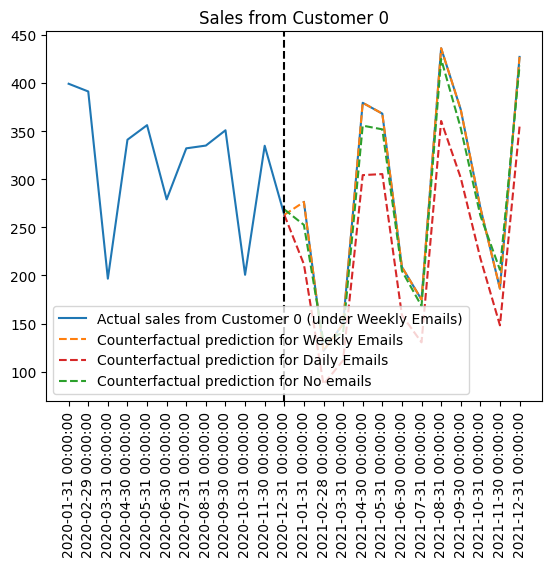

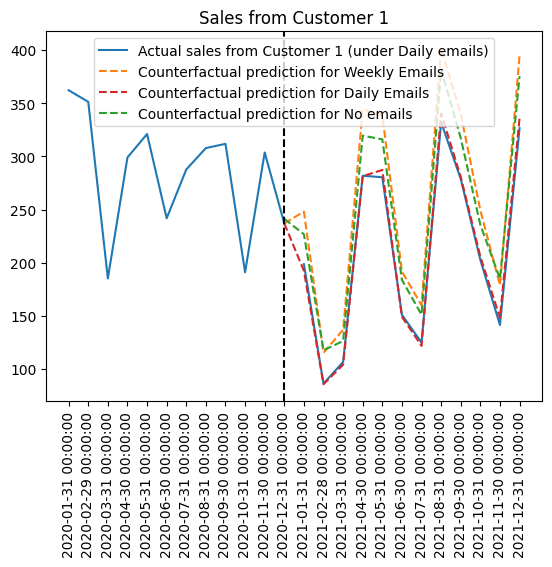

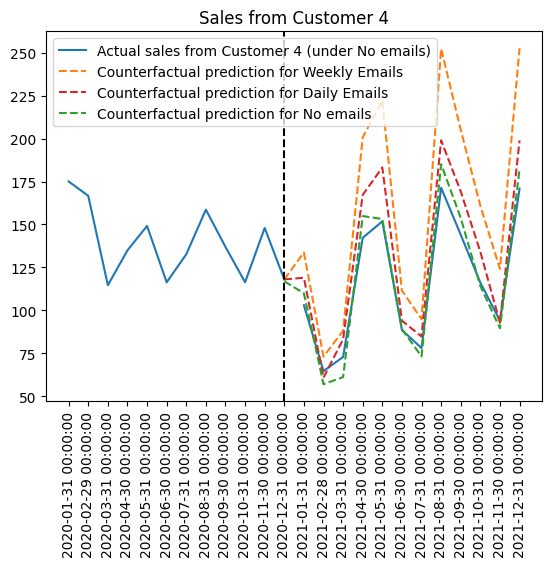

In [8]:
units = [0,1,4]
interventions = ["Weekly Emails", "Daily emails", "No emails"]
colors = {"Weekly Emails":"tab:orange", "Daily Emails":"tab:red", "No emails":"tab:green"}
for u, unit in enumerate(units):
    plt.figure()
    plt.title(f"Sales from Customer {unit}")
    plt.plot(pre_df.loc[pre_df.unit == unit].iloc[:,3:].T)
    plt.plot(post_df.loc[post_df.unit == unit].iloc[:,3:].T, color = "tab:blue", label = f"Actual sales from Customer {unit} (under {interventions[u]})")
    syn = synthetic_sales.synthetic_results
    plt.plot(syn.loc[(syn.unit == unit)&(syn.intervention == "Weekly Emails")].iloc[:,14:].T, '--', color = "tab:orange", label = 'Counterfactual prediction for Weekly Emails')
    plt.plot(syn.loc[(syn.unit == unit)&(syn.intervention == "Daily Emails")].iloc[:,14:].T, '--',  color = "tab:red",  label = 'Counterfactual prediction for Daily Emails')
    plt.plot(syn.loc[(syn.unit == unit)&(syn.intervention == "No emails")].iloc[:,14:].T, '--', color = "tab:green" ,label = 'Counterfactual prediction for No emails')

    plt.axvline(11, linestyle = 'dashed', color = 'black')


    plt.xticks(rotation = 90)
    plt.legend()
    plt.show()
    

#### Cross-validation $R^2$ values: We will compute the $R^2$ value for all units. The $R^2$ estimate whether we can reproduce the observations we have seen for each unit under the intervention they have experienced in the data. i.e., can we faithfully predict what has happened? 

In [9]:

synthetic_sales.cross_validation_score.mean(numeric_only=True)

unit             249.500000
R2_rct scores      0.913495
R2 scores          0.753764
dtype: float64

#### Since this is a synthetic data, we can also directly compare with the ground truth. 

In [10]:
# load ground truth data
truth = pd.read_csv("../data/sales_syn_example_all_cfs.csv")
truth

,unit,intervention,metric,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-31 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00
0,0,No emails,monthly_sales,252.160910,115.111738,129.196453,359.765249,351.727105,196.359403,158.317161,428.164185,355.426167,256.444027,190.202629,419.880722
1,1,No emails,monthly_sales,219.099313,104.722639,114.892251,318.246299,317.413079,174.363787,140.081450,385.692800,316.548259,231.065123,176.896173,379.513545
2,2,No emails,monthly_sales,118.620551,70.123248,70.651536,196.237550,220.633728,106.390357,83.228979,264.272486,203.283321,157.110389,136.560978,264.890839
3,3,No emails,monthly_sales,155.274441,92.860123,98.138676,192.968802,178.967697,127.975786,112.331756,211.602896,188.063570,145.078367,116.035095,206.339364
4,4,No emails,monthly_sales,103.011890,64.683385,72.892500,142.200822,151.816503,88.554397,78.086177,171.363885,144.003509,116.163992,94.017278,170.908827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,495,Weekly Emails,monthly_sales,289.184528,131.829205,155.327873,392.243639,374.203646,220.670228,184.294077,448.018692,383.802731,278.211494,196.595149,437.658950
1496,496,Weekly Emails,monthly_sales,94.679371,58.202420,71.386021,152.183976,183.343412,83.923409,72.473335,202.270415,159.790991,131.075884,105.285699,205.161111
1497,497,Weekly Emails,monthly_sales,151.721179,78.671313,96.441616,221.347415,237.828120,123.033910,105.029803,271.301656,223.990084,173.064853,129.227507,270.286505
1498,498,Weekly Emails,monthly_sales,188.731855,99.353358,111.237078,268.885254,274.558243,153.817802,128.294593,324.518272,268.973365,203.345548,157.780698,320.766295


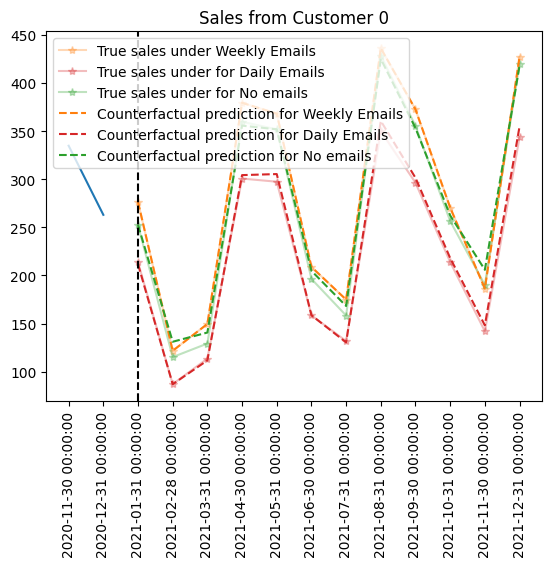

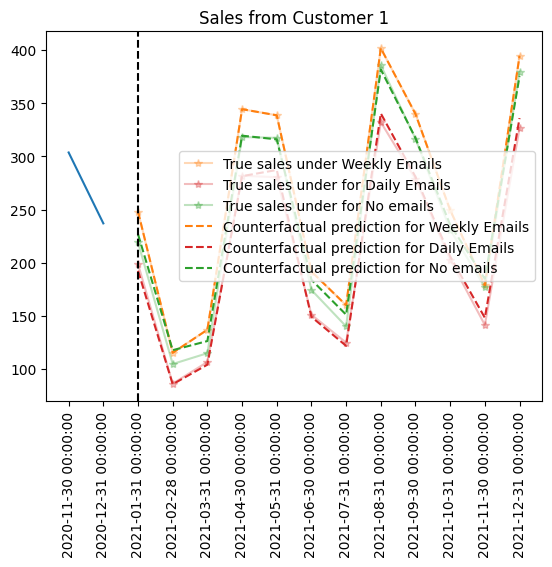

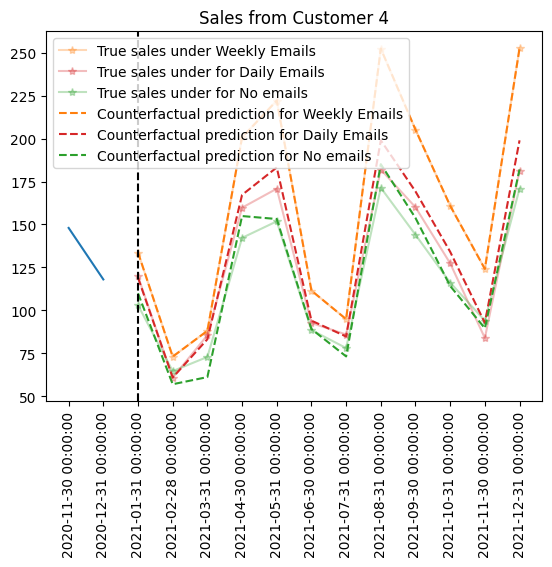

In [11]:
# plot the same units
units = [0,1,4]
interventions = ["Daily Emails", "No emails", "Weekly Emails"]
colors = {"Weekly Emails":"tab:orange", "Daily Emails":"tab:red", "No emails":"tab:green"}
for u, unit in enumerate(units):
    plt.figure()
    plt.title(f"Sales from Customer {unit}")
    plt.plot(pre_df.loc[pre_df.unit == unit].iloc[:,13:].T)
    syn = synthetic_sales.synthetic_results

    plt.plot(truth.loc[(truth.unit == unit)&(truth.intervention == "Weekly Emails")].iloc[:,3:].T, '*-', alpha = 0.3,  color = "tab:orange", label = 'True sales under Weekly Emails')
    plt.plot(truth.loc[(truth.unit == unit)&(truth.intervention == "Daily Emails")].iloc[:,3:].T, '*-',  alpha = 0.3, color = "tab:red",  label = 'True sales under for Daily Emails')
    plt.plot(truth.loc[(truth.unit == unit)&(truth.intervention == "No emails")].iloc[:,3:].T, '*-', alpha = 0.3, color = "tab:green" ,label = 'True sales under for No emails')

    plt.plot(syn.loc[(syn.unit == unit)&(syn.intervention == "Weekly Emails")].iloc[:,15:].T, '--', color = "tab:orange", label = 'Counterfactual prediction for Weekly Emails')
    plt.plot(syn.loc[(syn.unit == unit)&(syn.intervention == "Daily Emails")].iloc[:,15:].T, '--',  color = "tab:red",  label = 'Counterfactual prediction for Daily Emails')
    plt.plot(syn.loc[(syn.unit == unit)&(syn.intervention == "No emails")].iloc[:,15:].T, '--', color = "tab:green" ,label = 'Counterfactual prediction for No emails')

    plt.axvline(2, linestyle = 'dashed', color = 'black')


    plt.xticks(rotation = 90)
    plt.legend()
    plt.show()
    

### Training error (fit on pre-intervention data)

As a sanity check, let's see if the linear model we learned had a small training error in the preintervention period. Below we see that this is indeed the case as we showcase for some of the units below (it holds for all units)

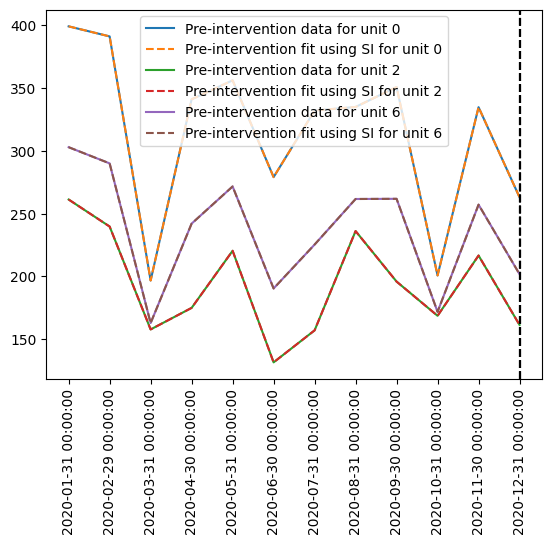

In [18]:
units = [0,2,6]
plt.figure()
    
for u, unit in enumerate(units):
    plt.plot(pre_df.loc[pre_df.unit == unit].iloc[:,3:].T, label = f"Pre-intervention data for unit {unit}")
    syn = synthetic_sales.synthetic_results
    plt.plot(syn.loc[(syn.unit == unit)&(syn.intervention == "Weekly Emails")].iloc[:,3:15].T, '--' , label = f'Pre-intervention fit using SI for unit {unit}')
    
    plt.axvline(11, linestyle = 'dashed', color = 'black')

    plt.xticks(rotation = 90)
plt.legend()
plt.show()


Further, we can fill-in some of the gaps (missing data) in the pre-interventions periods quite accurately, as showcase for some of the units we masked eariler in the notebook. 

#### These observations were missing!

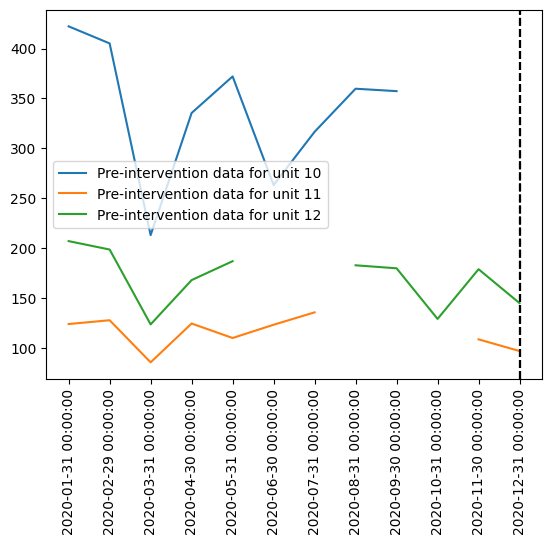

In [22]:
units = [10,11,12]
plt.figure()
    
for u, unit in enumerate(units):
    plt.plot(pre_df.loc[pre_df.unit == unit].iloc[:,3:].T, label = f"Pre-intervention data for unit {unit}")
    plt.axvline(11, linestyle = 'dashed', color = 'black')

    plt.xticks(rotation = 90)
plt.legend()
plt.show()


#### SI is able to accurately recover them

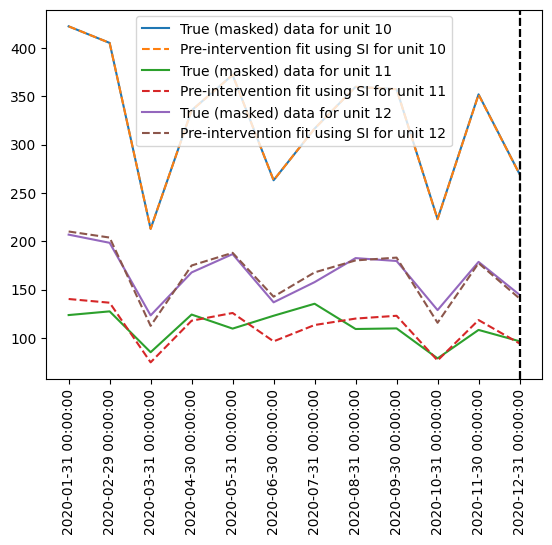

In [24]:
units = [10,11,12]
plt.figure()
    
for u, unit in enumerate(units):
    plt.plot(pre_df_true.loc[pre_df.unit == unit].iloc[:,3:].T, label = f"True (masked) data for unit {unit}")
    syn = synthetic_sales.synthetic_results
    plt.plot(syn.loc[(syn.unit == unit)&(syn.intervention == "Weekly Emails")].iloc[:,3:15].T, '--' , label = f'Pre-intervention fit using SI for unit {unit}')
    
    plt.axvline(11, linestyle = 'dashed', color = 'black')

    plt.xticks(rotation = 90)
plt.legend()
plt.show()


## Conclusion 

#### 1. On average, Weekly emails is the best promotional intervention

If we look at the average sales (including counterfactual estimates) across all units (customers), it seems that weekly emails is the best strategy.

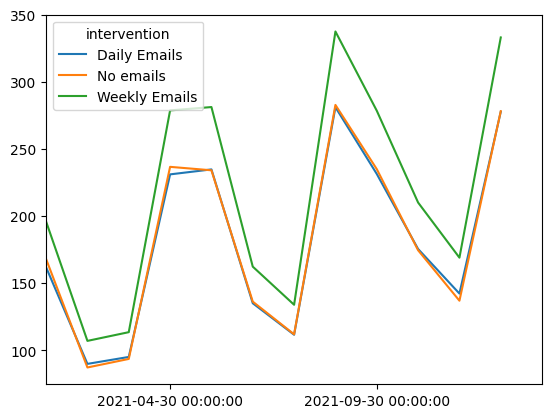

In [25]:
syn.groupby("intervention").mean(numeric_only = True).T.plot()
plt.xticks(rotation = 0)
plt.xlim([12,24])
plt.show()

#### 2. For some customers, no promotional emails at all is better than daily emails, highlighting the importance of estimating individual-level treatment effect.

For Customer 0, for example, the counterfactual estimate indicates that daily emails will lower the sales consistently (compared to control).. 

<Figure size 640x480 with 0 Axes>

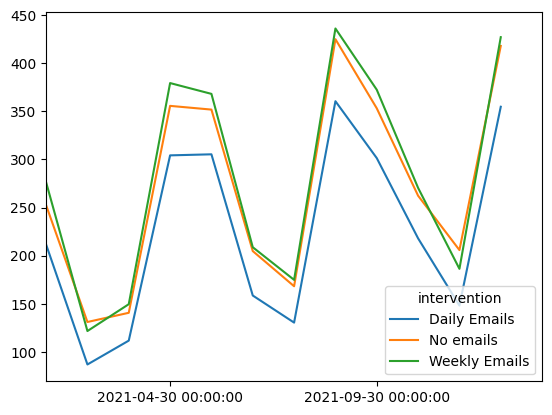

In [26]:
plt.figure()
syn.loc[syn.unit == 0].groupby("intervention").mean(numeric_only = True).T.plot()
plt.xticks(rotation = 0)
plt.xlim([12,24])
plt.show()

Whereas for customer 3, the counterfactual estimate indicates that daily emails will *increase* the sales. 

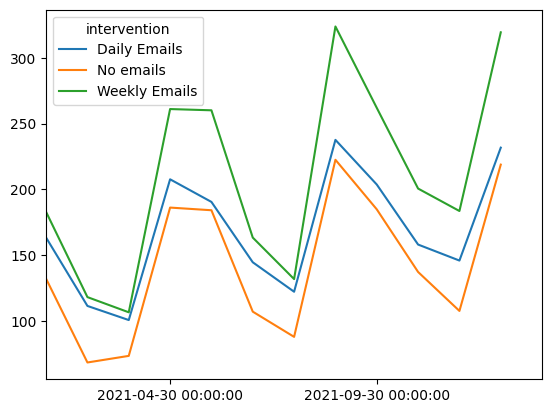

In [27]:
syn.loc[syn.unit == 3].groupby("intervention").mean(numeric_only = True).T.plot()
plt.xticks(rotation = 0)
plt.xlim([12,24])
plt.show()